# CSX46 Homework 3 - Maximum Flow

For this homework exercise, we will need `numpy` and `igraph` and `pandas`

Yuanhao Zuo 933643293

In [74]:
import numpy
import igraph
import pandas

## Question 1

Define an adjacency matrix for a simple directed graph with six vertices, as shown here:

In [75]:
'''class Graph(object):
    size = 6
    def __init__(self, size):
        self.adjMatrix = []
        for i in range(size):
            self.adjMatrix.append([0 for i in range(size)])
        self.size = size'''
A,B,C,D,E,X = range(6)
adjacencyMatrix = [[0, 1, 1, 0, 1, 1], #A
                    [0, 0, 0, 0, 0, 0],#B 
                    [0, 0, 0, 0, 0, 1],#C
                    [0, 0, 0, 0, 1, 0],#D
                    [0, 0, 0, 0, 0, 1],#E
                    [0, 0, 0, 0, 0, 0]]#X
ajMatrix = igraph.Graph.Adjacency(adjacencyMatrix)



Make an igraph graph out of this adjacency matrix, and print the graph and its summary:

IGRAPH D--- 6 7 -- 
+ attr: label (v)


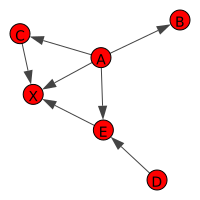

In [85]:
print(ajMatrix.summary())
ajMatrix.vs["label"] = ["A", "B", "C", "D", "E", "X"]
igraph.drawing.plot(ajMatrix, bbox=(0, 0, 200, 200))

Using the `Graph.maxflow` function, compute the max-flow between all possible pairs of distinct vertices. Which pair of vertices have the maximum flow between them? 

In [82]:
max_flow = 0
for i in range(6):
    for j in range(6):
        if i == j:
            continue;
        else:
            flow = igraph.Graph.maxflow(ajMatrix,i,j)
            if flow.value > max_flow:
                max_flow = flow.value
                V1 = i
                V2 = j
g_label = ajMatrix.vs["label"]
print("Vertex1: %s, Vertex2: %s, maxflow: %s" % (g_label[V1], g_label[V2], max_flow))
            
            

Vertex1: A, Vertex2: X, maxflow: 3.0


Bonus point: how one would do it using a functional programming style, without a for loop?

## Question 2

You are going to need to load in the network `shared/hsmetnet.txt` in edge-list format (hint: `pandas.read_csv`), and load it into a digraph using `igraph.Graph.TupleList`

In [63]:
import pandas
hsmetnet_data = pandas.read_csv("shared/hsmetnet.txt",sep = "\t", names = ["source","target"])
#print(hsmetnet_data)
vertices = igraph.Graph.TupleList(hsmetnet_data[["source","target"]].values.tolist(), directed = True)
igraph.Graph.summary(vertices)

'IGRAPH DN-- 7879 19708 -- \n+ attr: name (v)'

Always check the graph using `igraph.Graph.summary`

What is the maximum flow in this network, between the vertex `alpha-D-glucose` and the vertex `pyruvate`? To answer this question, you will probably want to use the following steps:

- find the vertex ID of `alpha-D-glucose`
- find the vertex ID of `pyruvate`
- use `igraph.Graph.maxflow` to get the maximum flow between these two vertex IDs (with `alpha-D-glucose` as the `source` and `pyruvate` as the `target`)

In [71]:
index1 = vertices.vs.find(name = 'alpha-D-glucose').index
index2 = vertices.vs.find(name = 'pyruvate').index
res = igraph.Graph.maxflow(vertices, index1, index2)
print(res)

Graph flow (5 edges, 2069 vs 5810 vertices, value=5.0000)


Why do you think this pair of vertices has such a high maximum-flow?

Because the whole metabolic network need enery, so glycolysis happen frequently. Moreover, alpha-D-glucose and pyruvate are reactant and product of glycolysis. As a result, this pair of vertices has such a high maximum flow.